In [1]:
import numpy as np; print('numpy', np.__version__)
from scipy.spatial.distance import pdist, squareform
from mantel import test
from geopy.distance import geodesic
import matplotlib.pyplot as plt
from scipy.stats import linregress

numpy 1.25.1


In [32]:
#GPS Coordinates (9 populations)
gps_coordinates = np.array([
    [19.6049, -155.5244], # Population 1 Big Island
    [22.0646, -159.5022], # Population 2 Kauai
    [21.4440, -157.9482], # Population 3 Oahu
    [20.7863, -156.3341], # Population 4 Maui
    [13.4622, 144.7827],  # Population 5 Guam
    [8.7205, 167.7335],   # Population 6 RMI
    [28.1767, -81.5456],  # Population 7 FL
    [33.9168, -118.0492], # Population 8 CA
    [13.6811, 100.5786]   # Population 9 Thai
])

In [33]:
# Genetic Distance Matrix (Fst values, 9x9)
fst_matrix = np.array([
    [0.0, 0.0145, 0.0195, 0.0204, 0.0700, 0.0552, 0.0779, 0.0795, 0.0843],
    [0.0145, 0.0, 0.0021, 0.0072, 0.0495, 0.0417, 0.0614, 0.0535, 0.0553],
    [0.0195, 0.0021, 0.0, 0.0121, 0.0584, 0.0456, 0.0670, 0.0549, 0.0586],
    [0.0204, 0.0072, 0.0121, 0.0, 0.0535, 0.0495, 0.0689, 0.0538, 0.0586],
    [0.0700, 0.0495, 0.0584, 0.0535, 0.0, 0.0732, 0.0419, 0.0483, 0.0527],
    [0.0552, 0.0417, 0.0456, 0.0495, 0.0732, 0.0, 0.0858, 0.0891, 0.0923],
    [0.0779, 0.0614, 0.0670, 0.0689, 0.0419, 0.0858, 0.0, 0.0476, 0.0481],
    [0.0795, 0.0535, 0.0549, 0.0538, 0.0483, 0.0891, 0.0476, 0.0, 0.0506],
    [0.0843, 0.0553, 0.0586, 0.0586, 0.0527, 0.0923, 0.0481, 0.0506, 0.0]
])

In [34]:
is_symmetric = np.allclose(fst_matrix, fst_matrix.T)
print(f"Is the matrix symmetric? {is_symmetric}")

Is the matrix symmetric? True


In [35]:
#Calculate Geographic Distance Matrix (Euclidean distance)  ##Chose one of two calculations.
geo_dist_matrix = squareform(pdist(gps_coordinates, metric="euclidean"))

In [36]:
#Calculate Geographic Distance Matrix (Great Circle Km)
geo_dist_matrix_km = np.zeros((len(gps_coordinates), len(gps_coordinates)))

for i in range(len(gps_coordinates)):
    for j in range(len(gps_coordinates)):
        if i != j:
            geo_dist_matrix_km[i, j] = geodesic(gps_coordinates[i], gps_coordinates[j]).km

In [37]:
#Convert fst_matrix into condensed
fst_condensed = squareform(fst_matrix)    

In [38]:
#Run Mantel Test
r, p_value, z = test(geo_dist_matrix_km, fst_matrix, perms=999, method='pearson')

In [39]:
# Output the Results
print("Mantel Test Results:")
print(f"Correlation (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

Mantel Test Results:
Correlation (r): 0.5476
P-value: 0.0090


In [40]:
#Conver geo_dist_matrix into Condensed
geo_dist_condensed = squareform(geo_dist_matrix_km)

In [41]:
#Regression
slope, intercept, r_value, p_value_line, std_err = linregress(geo_dist_condensed, fst_condensed)

In [42]:
print("Geographic Distance (condensed):", geo_dist_condensed)
print("Genetic Distance (condensed):", fst_condensed)
print("Length of geo_dist_condensed:", len(geo_dist_condensed))
print("Length of fst_condensed:", len(fst_condensed))

Geographic Distance (condensed): [  495.51308528   324.57942024   155.7793825   6378.43113328
  4134.47834159  7483.31591257  4021.96268231 10920.03748092
   174.81475557   357.63018499  5953.84033172  3802.41946426
  7757.0902487   4251.65252454 10444.16957649   182.81629585
  6116.06785524  3936.73508641  7636.10041221  4141.27768819
 10617.90240759  6286.4996732   4080.55508511  7510.03664516
  4029.36156406 10799.66904454  2560.33516646 13228.71000199
  9834.59225681  4777.3934901  11543.77496898  8021.8879238
  7333.8568481   3523.28830658 15367.26070745 13344.74108876]
Genetic Distance (condensed): [0.0145 0.0195 0.0204 0.07   0.0552 0.0779 0.0795 0.0843 0.0021 0.0072
 0.0495 0.0417 0.0614 0.0535 0.0553 0.0121 0.0584 0.0456 0.067  0.0549
 0.0586 0.0535 0.0495 0.0689 0.0538 0.0586 0.0732 0.0419 0.0483 0.0527
 0.0858 0.0891 0.0923 0.0476 0.0481 0.0506]
Length of geo_dist_condensed: 36
Length of fst_condensed: 36


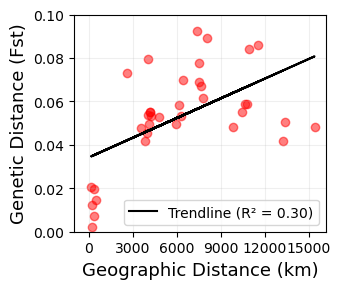

In [44]:
plt.figure(figsize=(3.5, 3))
plt.scatter(geo_dist_condensed, fst_condensed, alpha=0.5, color='red')
plt.plot(geo_dist_condensed, slope * geo_dist_condensed + intercept, color='black', label=f"Trendline (R² = {r_value**2:.2f})")
plt.title("")
plt.xlabel("Geographic Distance (km)", fontsize=13)
plt.ylabel("Genetic Distance (Fst)", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,0.10)
plt.xlim(-1000, 16150)
plt.xticks(np.arange(0, 16150, 3000))
plt.legend(prop={'size': 10})
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("Mantel_Test.svg", format="svg", dpi=600)
plt.show()

In [47]:
####for Hawaii

In [6]:
#GPS Coordinates (9 populations)
gps_coordinates_noHawaii = np.array([
    [19.6049, -155.5244], # Population 1 Big Island
    [22.0646, -159.5022], # Population 2 Kauai
    [21.4440, -157.9482], # Population 3 Oahu
    [20.7863, -156.3341], # Population 4 Maui
])

In [7]:
# Genetic Distance Matrix (Fst values, 9x9)
fst_matrix_noHawaii = np.array([
    [0.0, 0.0145, 0.0195, 0.0204],
    [0.0145, 0.0, 0.0021, 0.0072],
    [0.0195, 0.0021, 0.0, 0.0121],
    [0.0204, 0.0072, 0.0121, 0.0],
    ])

In [8]:
#Calculate Geographic Distance Matrix (Great Circle Km)
geo_dist_matrix_km_noHawaii = np.zeros((len(gps_coordinates_noHawaii), len(gps_coordinates_noHawaii)))

for i in range(len(gps_coordinates_noHawaii)):
    for j in range(len(gps_coordinates_noHawaii)):
        if i != j:
            geo_dist_matrix_km_noHawaii[i, j] = geodesic(gps_coordinates_noHawaii[i], gps_coordinates_noHawaii[j]).km

In [9]:
#Convert fst_matrix into condensed
fst_condensed_noHawaii = squareform(fst_matrix_noHawaii)    

In [10]:
#Run Mantel Test
r, p_value, z = test(geo_dist_matrix_km_noHawaii, fst_matrix_noHawaii, perms=999, method='pearson')

In [11]:
# Output the Results
print("Mantel Test Results:")
print(f"Correlation (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

Mantel Test Results:
Correlation (r): 0.1010
P-value: 0.8333


In [12]:
#Conver geo_dist_matrix into Condensed
geo_dist_condensed_noHawaii = squareform(geo_dist_matrix_km_noHawaii)

In [55]:
#Regression
slope, intercept, r_value, p_value_line, std_err = linregress(geo_dist_condensed_noHawaii, fst_condensed_noHawaii)

In [13]:
print("Geographic Distance (condensed):", geo_dist_condensed_noHawaii)
print("Genetic Distance (condensed):", fst_condensed_noHawaii)
print("Length of geo_dist_condensed:", len(geo_dist_condensed_noHawaii))
print("Length of fst_condensed:", len(fst_condensed_noHawaii))

Geographic Distance (condensed): [495.51308528 324.57942024 155.7793825  174.81475557 357.63018499
 182.81629585]
Genetic Distance (condensed): [0.0145 0.0195 0.0204 0.0021 0.0072 0.0121]
Length of geo_dist_condensed: 6
Length of fst_condensed: 6


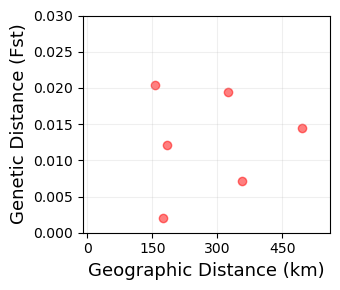

In [18]:
plt.figure(figsize=(3.5, 3))
plt.scatter(geo_dist_condensed_noHawaii, fst_condensed_noHawaii, alpha=0.5, color ='red')
plt.plot(geo_dist_condensed_noHawaii)
plt.title("")
plt.xlabel("Geographic Distance (km)", fontsize=13)
plt.ylabel("Genetic Distance (Fst)", fontsize=13)
plt.ylim(0,0.03)
plt.xlim(-10, 560)
xtick_values = np.arange(0, 561, 150)
plt.xticks(xtick_values, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("mantel_test_graph_Hawaii_Mar.svg", format="svg")
plt.show()